In [2]:
# Problem 1

import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, describe

df = pd.read_csv('problem1.csv')
data = np.array(df)

# 1a. Calculate the first four moment values using normalized formulas from Week 1
muHat = np.sum(data)/data.size
print(f'Normalized Mean: {muHat}')
dataCorr = data - muHat
varHat = np.sum(np.square(dataCorr))/(data.size-1)
print(f'Normalized Variance: {varHat}')
cm2 = np.sum(np.square(dataCorr))/data.size
skewHat = np.sum(np.power(dataCorr, 3))/data.size/np.sqrt(np.power(cm2, 3))
print(f'Normalized Skew: {skewHat}')
kurtosisHat = np.sum(np.power(dataCorr, 4))/data.size/np.power(cm2, 2)
excessKurtosisHat = kurtosisHat-3
print(f'Normalized Kurtosis: {excessKurtosisHat}')

# 1b. Calculate the first four moments used your chosen statistical package
pacMean = np.mean(data)
print(f'Package Mean: {pacMean}')
pacVariance = np.var(data)
print(f'Package Variance: {pacVariance}')
pacSkew = skew(data)
print(f'Package Skew: {pacSkew }')
pacKurtosis = kurtosis(data)
print(f'Package Kurtosis: {pacKurtosis}')


#1c. Is your statistical package functions biased?

'''
The numpy variance is biased, it does not match the normalized formula for variance. 

The scipy Skew & Kurtosis are not biased, they match the normalized results obtained with formula for skew & kurtosis. 

'''

Normalized Mean: 1.0489703904839585
Normalized Variance: 5.427220681881726
Normalized Skew: 0.8806086425277361
Normalized Kurtosis: 23.122200789989733
Package Mean: 1.0489703904839585
Package Variance: 5.421793461199845
Package Skew: [0.88060864]
Package Kurtosis: [23.12220079]


'\nThe numpy variance is biased, it does not match the normalized formula for variance. \n\nThe scipy Skew & Kurtosis are not biased, they match the normalized formulas for skew & kurtosis. \n\n'

OLS intercept: -0.08738446427005075
OLS beta: 0.7752740987226114
OLS std deviation: 1.0062751598133177
MLE intercept: -0.08738068964308353
MLE beta: 0.7752749200910115
MLE std deviation: 1.0037545075840428
MLE ll: -284.5375630565922
MLE aic: 575.1975750927762
MLE T intercept: -0.0972693180452746
MLE T beta: 0.6750102348331753
MLE T std deviation: 0.8551056634261536
MLE T df: 7.159899482567788
MLE T ll: -281.29340318028585
MLE T aic: 570.7919345656999


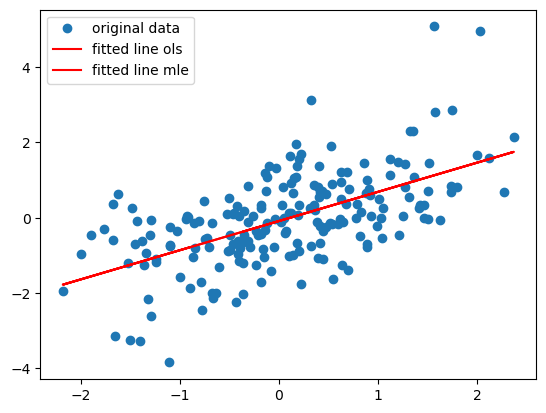

In [55]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
from scipy import stats 

def likelihood_normal(params):
    b0, b1, sigma = params
    n = len(data)
    log_likelihood = -0.5*n*np.log(sigma**2 * 2 * np.pi) - np.sum((y-(b1*x+ b0))**2)/(2*sigma**2)
    return -log_likelihood

def likelihood_t(params):
    b0, b1, sigma, df = params
    log_likelihood = np.sum(np.log(stats.t.pdf(x=y-(b1*x + b0), df=df, scale=sigma)))
    return -log_likelihood

# Problem 2

#2.a Fit data in problem2.csv using OLS. Then, fit the data using MLE given the assumption of normality. Compare their beta and standard deviation of the OLS error to the fitted MLE standard deviation. 
df = pd.read_csv('problem2.csv')
data = np.array(df)

x = df.x
y = df.y
n = x.size
res = stats.linregress(x, y)

print(f'OLS intercept: {res.intercept}')
print(f'OLS beta: {res.slope}')

e = y - (res.slope * x + res.intercept)
resstd = stats.tstd(e)
print(f'OLS std deviation: {resstd}')

result = minimize(likelihood_normal, np.array([1, 1, 1]), method='L-BFGS-B')
k = 3
b0 = result.x[0]
b1 = result.x[1]
sigma = result.x[2]
logLik = -0.5*n*np.log(sigma**2 * 2 * np.pi) - np.sum((y-(b1*x+ b0))**2)/(2*sigma**2)
aic = 2*k - 2*logLik + (2*k**2 + 2*k)/(n-k-1)

print(f'MLE intercept: {b0}')
print(f'MLE beta: {b1}')
print(f'MLE std deviation: {sigma}')
print(f'MLE ll: {logLik}')
print(f'MLE aic: {aic}')

tresult = minimize(likelihood_t, np.array([1, 1, 1, 1]), method='L-BFGS-B')
tb0 = tresult.x[0]
tb1 = tresult.x[1]
tsigma = tresult.x[2]
tdf = tresult.x[3]
logLik = np.sum(np.log(stats.t.pdf(x=y-(tb1*x + tb0), df=tdf, scale=tsigma)))
tk = 4
taic = 2*tk - 2*logLik + (2*tk**2 + 2*tk)/(n-tk-1)
print(f'MLE T intercept: {tb0}')
print(f'MLE T beta: {tb1}')
print(f'MLE T std deviation: {tsigma}')
print(f'MLE T df: {tdf}')
print(f'MLE T ll: {logLik}')
print(f'MLE T aic: {taic}')

plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line ols')
plt.plot(x, result.x[0] + result.x[1] * x, 'r', label='fitted line mle')
plt.legend()
plt.show()

# variance is biased estimate for MLE and is unbiased for Ordinary Least Squares, therefore MLE std error is lower

# MLE with T distribution fits better becuase it has a lower AIC 



In [52]:

df = pd.read_csv('problem2_x.csv')
x = df.x1
y = df.x2
n = x.size
data = np.array(df)
result = minimize(likelihood_normal, np.array([1, 1]), method='L-BFGS-B')
k = 3
mean = result.x[0]
b1 = result.x[1]
sigma = result.x[2]


print(f'MLE intercept: {b0}')
print(f'MLE beta: {b1}')
print(f'MLE std deviation: {sigma}')

MLE intercept: 0.9897369501378267
MLE beta: 0.49607133761440536
MLE std deviation: 0.8351752367641241
MLE ll: -1238.8248186991216
MLE aic: 2483.649637398243


mu x1: 0.0010226951490000004
mu x2: 0.9902438191000001
sigma: [[1.06977464 0.53068455]
 [0.53068455 0.96147329]]
0     0.592912
1     1.211941
2     1.582989
3     1.133166
4     1.056346
        ...   
95    1.772319
96    0.480611
97    0.958081
98    1.584177
99    0.705882
Name: x1, Length: 100, dtype: float64
1.6377625456612472


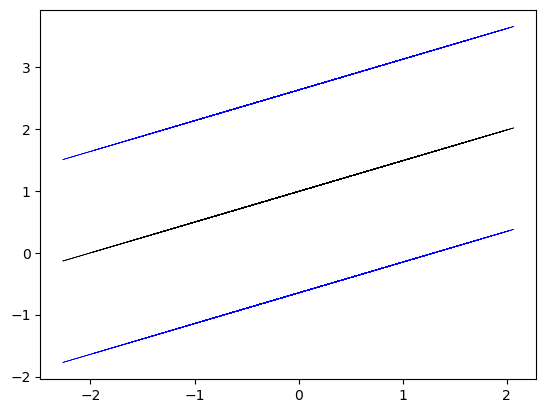

In [88]:
# 2c.
df = pd.read_csv('problem2_x.csv')
# vector a
x1 = df.x1
x2 = df.x2
mux1 = np.mean(x1)
mux2 = np.mean(x2)
print(f'mu x1: {mux1}')
print(f'mu x2: {mux2}')
sigma = np.cov(x1, x2)
print(f'sigma: {sigma}')
df = pd.read_csv('problem2_x1.csv')
# vector a
a = df.x1 
q = len(x1)

sigma11 = sigma[0][0]
sigma12 = sigma[0][1]
sigma22 = sigma[1][1]
sigma21 = sigma[1][0]

mubar = mux2 + sigma21* (1/sigma11) * (a-mux1)
sigmabar = sigma22 - sigma21*(1/sigma11)*(sigma21)

print(mubar)

from matplotlib import pyplot as plt
import numpy as np



# Define the confidence interval
ci = 1.96 * np.sqrt(sigmabar)
print(ci)
plt.plot(a, mubar, color='black', lw=0.5)
plt.plot(a, mubar-ci, color='blue', lw=0.5)
plt.plot(a, mubar+ci, color='blue', lw=0.5)

plt.show()

1644.6555047688473
1581.0792659049778
1436.6598066945862
1567.4036263707894
1537.94120638074
1536.8677087350327


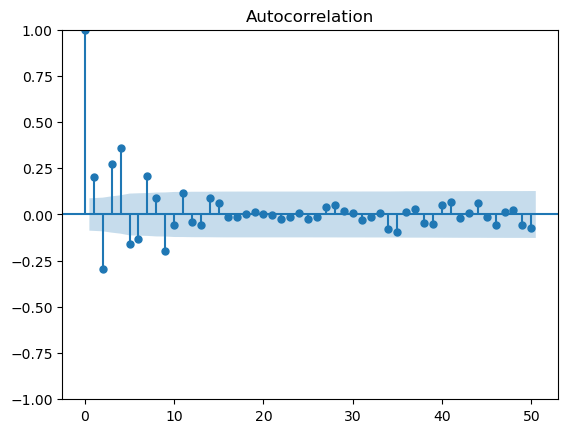

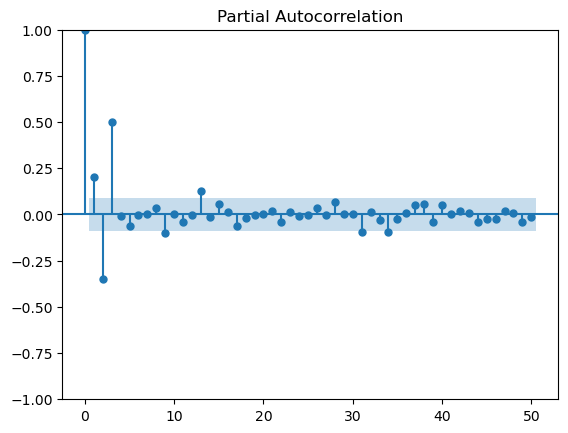

In [62]:
from statsmodels.tsa.arima.model import ARIMA

# 3.
df = pd.read_csv('problem3.csv')
# vector a
x = df.x

# ACF/ PCF Graphs

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(x, lags=50);

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(x, lags=50);

mod_ar1 = ARIMA(x, order=(1, 0, 0))
res_ar1 = mod_ar1.fit()
print(res_ar1.aic)
mod_ar2= ARIMA(x, order=(2, 0, 0))
res_ar2 = mod_ar2.fit()
print(res_ar2.aic)
mod_ar3= ARIMA(x, order=(3, 0, 0))
res_ar3 = mod_ar3.fit()
print(res_ar3.aic)
mod_ma1 = ARIMA(x, order=(0, 0, 1))
res_ma1 = mod_ma1.fit()
print(res_ma1.aic)
mod_ma2 = ARIMA(x, order=(0, 0, 2))
res_ma2 = mod_ma2.fit()
print(res_ma2.aic)
mod_ma3 = ARIMA(x, order=(0, 0, 3))
res_ma3 = mod_ma3.fit()
print(res_ma3.aic)